In [2]:
# train a perceptron in sklearn
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report


iris = load_iris()
x = iris.data[:, (2,3)]
y = (iris.target == 0).astype(int)

per_clf = Perceptron()
per_clf_fit = per_clf.fit(x,y)

print(classification_report(y,per_clf_fit.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [2]:
#load fashion mnist dataset

import tensorflow as tf
from tensorflow import keras 

mnist = keras.datasets.fashion_mnist

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress','Coat',
                'Sandal','Shirt','Sneaker','Bag','Ankle boot']    

In [4]:
# build the neural network

model = keras.models.Sequential() # start the model
model.add(keras.layers.Flatten(input_shape=[28,28])) # This is the input layer. Flatten the data. Original data is 28 by 28 pixels
model.add(keras.layers.Dense(300, activation = 'relu')) # first hidden layer
model.add(keras.layers.Dense(100, activation = 'relu')) # another hidden layer
model.add(keras.layers.Dense(10, activation = 'softmax')) #this is the output layer. 10 neurons for ten fashion classes softmax activation because the classes are exclusive

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [5]:
# setup the model compiler

model.compile(loss = "sparse_categorical_crossentropy",
                optimizer = 'sgd',
                metrics = ['accuracy'])

In [8]:
#run the model

history = model.fit(x_train, y_train, epochs = 30,
                    validation_data = (x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2263 - accuracy: 0.9179 - val_loss: 0.2999 - val_accuracy: 0.8946
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2237 - accuracy: 0.9195 - val_loss: 0.2873 - val_accuracy: 0.8962
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2201 - accuracy: 0.9207 - val_loss: 0.2981 - val_accuracy: 0.8926
Epoch 4/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2165 - accuracy: 0.9230 - val_loss: 0.2863 - val_accuracy: 0.8980
Epoch 5/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2128 - accuracy: 0.9231 - val_loss: 0.3054 - val_accuracy: 0.8944
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2104 - accuracy: 0.9256 - val_loss: 0.3127 - val_accuracy: 0.8884
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2062 - accuracy: 0.9259 - val_loss: 0.2902 - val_accuracy:

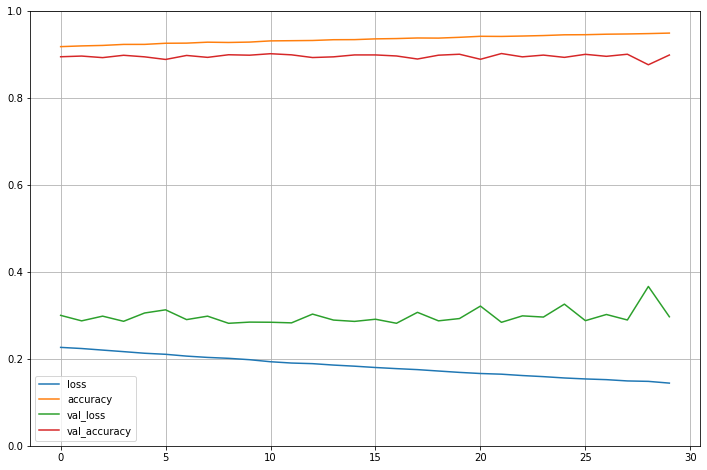

In [9]:
# plot the model history 

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (12,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()